In [1]:
'''
*1)índice de precio simple: variación de precios (de Precio y de Precio Original) 
de id Producto entre corrida y corrida. precio anterior/precio nuevo

*2)Promedio de precios por Tipo (de Precio y de Precio Original) por corrida
 índice de precios Promedio por Tipo simple: variación de precios promedio por Tipo (de Precio Promedio y de Precio Original Promedio) entre corrida y corrida. precio promedio anterior/precio promedio nuevo

*3)índice de stock simple: variación de stock de id Producto abierto por colores y talles. stock anterior/stock nuevo

*4)altas y bajas de id Producto: tomar fecha de iniciación y de baja. Si no aparece en 3 corridas es baja definitiva.
'''
   


'\n*1)índice de precio simple: variación de precios (de Precio y de Precio Original) \nde id Producto entre corrida y corrida. precio anterior/precio nuevo\n\n*2)Promedio de precios por Tipo (de Precio y de Precio Original) por corrida\n índice de precios Promedio por Tipo simple: variación de precios promedio por Tipo (de Precio Promedio y de Precio Original Promedio) entre corrida y corrida. precio promedio anterior/precio promedio nuevo\n\n*3)índice de stock simple: variación de stock de id Producto abierto por colores y talles. stock anterior/stock nuevo\n\n*4)altas y bajas de id Producto: tomar fecha de iniciación y de baja. Si no aparece en 3 corridas es baja definitiva.\n'

In [2]:
import pandas as pd
import pyodbc
import numpy as np
from pandas import ExcelWriter
import datetime


In [113]:
server = 'tcp:192.168.1.6'
database = 'planeamiento'
username = 'sa'
password = 'sa'
cnxn = pyodbc.connect('DRIVER={/opt/microsoft/msodbcsql17/lib64/libmsodbcsql-17.2.so.0.1};SERVER='+server+
                      ';DATABASE='+database+
                      ';UID='+username+
                      ';PWD='+ password) 

In [3]:
query = 'select * from sc2_detalle'
query = pd.read_sql(query,cnxn)

In [4]:
max_corrida = 'select max(id_sc2_corrida) from sc2_detalle'
max_corrida = pd.read_sql(max_corrida,cnxn)
max_corrida = max_corrida[""][0]

In [5]:
#1)*índice de precio simple: variación de precios (de Precio y de Precio Original) 
#de id Producto entre corrida y corrida. precio anterior/precio nuevo

resultado_variacion_precio = pd.DataFrame()
   
resultado_variacion_precio['id_sc2_producto'] = 0

for _ in range(max_corrida):
    
    if _ +1 == max_corrida:
        break
    #CORRIDA ANTERIOR
    corrida_anterior = query[query['id_sc2_corrida']==_+1]
    corrida_anterior.set_index(['id_sc2_producto','talle','tipo','color'], inplace=True)
    
    #CORRIDA ACTUAL
    corrida_actual = query[query['id_sc2_corrida']==_+2]
    corrida_actual.set_index(['id_sc2_producto','talle','tipo','color'], inplace=True)
    
    
    
    var1 = corrida_actual[['precio', 'precio_original']].divide(corrida_anterior[['precio', 'precio_original']], axis="index")
    
    var1.rename(columns={"precio": f"v_precio{str(_+1)}", 'precio_original': f'v_original{str(_+1)}'}, inplace=True)
    

    if _ == 0:
        resultado = pd.concat([var1], axis=1)
        #resultado.fillna(0, inplace=True)
    if _ >=1:
        resultado = pd.concat([resultado,var1], axis=1)
        #resultado.fillna(0, inplace=True)
    

In [6]:
#EXCEL
indice_precio_simple = resultado.reset_index()

'2019-08-26 16:04:12.818841'

In [8]:
#writer = ExcelWriter('../Salida/d.xlsx')
#resultado.to_excel(writer,'Hoja1')
#writer.save()

In [9]:
#*********************************** FIN DE VARIACION PRECIO ************************************

In [7]:
#2)*Promedio de precios por Tipo (de Precio y de Precio Original) por corrida
# índice de precios Promedio por Tipo simple: variación de precios promedio por Tipo (de Precio Promedio y de Precio Original Promedio) entre corrida y corrida. precio promedio anterior/precio promedio nuevo

for _ in range(max_corrida):
    
    if _ +1 == max_corrida:
        break
        
    #CORRIDA ANTERIOR
    corrida_anterior = query[query['id_sc2_corrida']==_+1]
    corrida_anterior = corrida_anterior.groupby('tipo')['precio','precio_original'].mean()
    corrida_anterior = pd.DataFrame(corrida_anterior)
    
    
    #CORRIDA ACTUAL
    corrida_actual = query[query['id_sc2_corrida']==_+2]
    corrida_actual = corrida_actual.groupby('tipo')['precio','precio_original'].mean()
    corrida_actual= pd.DataFrame(corrida_actual)
    
    
    var1 = corrida_anterior[['precio','precio_original']].divide(corrida_actual[['precio','precio_original']], axis="index")
    #var1 = pd.DataFrame(corrida_actual).reset_index()['precio'].divide(pd.DataFrame(corrida_anterior).reset_index()['precio'])
    
    var1.rename(columns={"precio": f"prom_precio{str(_+1)}", 'precio_original': f'prom_original{str(_+1)}'}, inplace=True)
    
    #resultado_promedio_tipo = corrida_anterior['precio'] / corrida_actual['precio']
    
    if _ == 0:
        resultado_prom_precio = pd.concat([var1], axis=1)
        #resultado.fillna(0, inplace=True)
    if _ >=1:
        resultado_prom_precio = pd.concat([resultado_prom_precio,var1], axis=1)
    

In [8]:
#GUARDAR EXCEL
resultado_prom_precio = resultado_prom_precio.reset_index()

In [12]:
#************************************* FIN DE PROMEDIO PRECIO TIPO ********************************    

In [9]:
#3) índice de stock simple: variación de stock de id Producto abierto por colores y talles. 
# stock anterior/stock nuevo

#resultado_variacion_stock = pd.DataFrame()
   
#resultado_variacion_stock['id_sc2_producto'] = 0

for _ in range(max_corrida):
    
    if _ +1 == max_corrida:
        break
    #CORRIDA ANTERIOR
    corrida_anterior = query[query['id_sc2_corrida']==_+1]
    corrida_anterior.set_index(['id_sc2_producto','talle','tipo','color'], inplace=True)
    
    #CORRIDA ACTUAL
    corrida_actual = query[query['id_sc2_corrida']==_+2]
    corrida_actual.set_index(['id_sc2_producto','talle','tipo','color'], inplace=True)
    
    
    
    var1 = corrida_actual[['stock']].divide(corrida_anterior[['stock']], axis="index")
    var2 = corrida_actual['stock'] - corrida_anterior['stock']
    var1.rename(columns={"stock": f"v_stock{str(_+1)}"}, inplace=True)
    
    

    if _ == 0:
        resultado_stock = pd.concat([var1,var2], axis=1)
        #resultado.fillna(0, inplace=True)
    if _ >=1:
        resultado_stock = pd.concat([resultado_stock,var1,var2], axis=1)
        #resultado.fillna(0, inplace=True)


In [10]:
resultado_stock = resultado_stock.reset_index()

In [15]:
#GUARDAR EXCEL

In [16]:
#********************************             **************************

In [17]:
'''select 
id_sc2_producto, 
id_sc2_corrida, 
talle, marca, 
tipo, 
color, 
sexo, 
descripcion_aux, 
descripcion, 
stock, 
moneda, 
precio, 
precio_original, fecha_alta, url_imagen, url_producto, id_sc2_producto, id_sc2_corrida, talle, marca, tipo, color, sexo, descripcion_aux, descripcion, stock, moneda, precio, precio_original, fecha_alta, url_imagen, url_producto, id_sc2_producto, id_sc2_corrida, talle, marca, tipo, color, sexo, descripcion_aux, descripcion, stock, moneda, precio, precio_original, fecha_alta, url_imagen, url_producto
from (
    select distinct id_sc2_corrida from sc2_detalle with (nolock)
    ) c
cross join 
    (
    select distinct id_sc2_producto, talle, color from sc2_detalle with (nolock)
    ) p
left join sc2_detalle d with (nolock) on d.id_sc2_corrida  = c.id_sc2_corrida  and d.id_sc2_producto = p.id_sc2_producto  and d.talle = p.talle and d.color = p.color 
where p.id_sc2_producto = 'Lingerie150904001' and p.talle = 'L' and p.color = 'Black'
'''

"select \nid_sc2_producto, \nid_sc2_corrida, \ntalle, marca, \ntipo, \ncolor, \nsexo, \ndescripcion_aux, \ndescripcion, \nstock, \nmoneda, \nprecio, \nprecio_original, fecha_alta, url_imagen, url_producto, id_sc2_producto, id_sc2_corrida, talle, marca, tipo, color, sexo, descripcion_aux, descripcion, stock, moneda, precio, precio_original, fecha_alta, url_imagen, url_producto, id_sc2_producto, id_sc2_corrida, talle, marca, tipo, color, sexo, descripcion_aux, descripcion, stock, moneda, precio, precio_original, fecha_alta, url_imagen, url_producto\nfrom (\n    select distinct id_sc2_corrida from sc2_detalle with (nolock)\n    ) c\ncross join \n    (\n    select distinct id_sc2_producto, talle, color from sc2_detalle with (nolock)\n    ) p\nleft join sc2_detalle d with (nolock) on d.id_sc2_corrida  = c.id_sc2_corrida  and d.id_sc2_producto = p.id_sc2_producto  and d.talle = p.talle and d.color = p.color \nwhere p.id_sc2_producto = 'Lingerie150904001' and p.talle = 'L' and p.color = 'Blac

In [11]:
#*4)altas y bajas de id Producto: tomar fecha de iniciación y de baja. 
#Si no aparece en N corridas es baja definitiva.

query_bajas = '''select c.*, p.*,d.id_sc2_corrida corrida_aux ,d.tipo,d.fecha_alta
from (
    select distinct id_sc2_corrida from sc2_detalle with (nolock)
    ) c
cross join 
    (
    select distinct id_sc2_producto, talle, color from sc2_detalle with (nolock)
    ) p
left join sc2_detalle d with (nolock) on d.id_sc2_corrida  = c.id_sc2_corrida  and d.id_sc2_producto = p.id_sc2_producto  and d.talle = p.talle and d.color = p.color '''
query_bajas = pd.read_sql(query_bajas,cnxn)

In [104]:
#Esta no se usa
# distinct_productos = '''select distinct id_sc2_producto, talle, color, tipo from sc2_detalle with (nolock)'''
# distinct_productos = pd.read_sql(distinct_productos,cnxn)

In [12]:
query_bajas = query_bajas.sort_values(['id_sc2_producto','talle','tipo','color']).reset_index(drop=True)

In [13]:
query_bajas['seguimiento'] = ['NO' if pd.isnull(row['corrida_aux']) else 'SI' for index,row in query_bajas.iterrows()]

In [14]:
query_bajas.drop('corrida_aux',axis=1,inplace=True)

In [15]:
sigue_si = query_bajas[query_bajas['seguimiento'] == 'SI']

In [16]:
sigue_no = query_bajas[query_bajas['seguimiento'] == 'NO']

In [17]:
#consultar, con la nueva corrida, si no esta.. se agrega a la tabla maestro de ids.
master_ids = query[['id_sc2_producto','talle','tipo','color','id_sc2_corrida','fecha_alta']]

In [18]:
master_ids.sort_values(['id_sc2_producto','id_sc2_corrida'],inplace = True)

/home/aa/miniconda3/envs/dev_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
minimos = master_ids.groupby(['id_sc2_producto','talle','tipo','color']).min().reset_index()

In [20]:
maximos = master_ids.groupby(['id_sc2_producto','talle','tipo','color']).max().reset_index()

In [21]:
merge_maxmin = pd.merge(maximos,minimos,on=['id_sc2_producto','talle','tipo','color'],how='inner')

In [22]:
merge_maxmin.rename(columns={'id_sc2_corrida_x':'max_corrida'},inplace=True)
merge_maxmin.rename(columns={'fecha_alta_x':'fecha_max'},inplace=True)
merge_maxmin.rename(columns={'id_sc2_corrida_y':'min_corrida'},inplace=True)
merge_maxmin.rename(columns={'fecha_alta_y':'fecha_min'},inplace=True)

In [27]:
#https://es.stackoverflow.com/questions/273117/como-crear-diferentes-hojas-en-un-mismo-excel-guardado-con-anterioridad/273224#273224
fecha = datetime.date.today()
start_ = datetime.datetime.today()

with pd.ExcelWriter('../Salida/indicadores/i_'+str(fecha)+'.xlsx') as writer:
    indice_precio_simple.to_excel(writer, sheet_name = "indice_de_precio_simple")
    resultado_prom_precio.to_excel(writer, sheet_name = "Promedio_de_precios_por_tipo")
    resultado_stock.to_excel(writer, sheet_name = "índice_de_stock_simple")
    
    sigue_si.to_excel(writer, sheet_name = "Productos_si")
    sigue_no.to_excel(writer, sheet_name = "Productos_no")
    master_ids.to_excel(writer, sheet_name= "Maestro_ids")
    merge_maxmin.to_excel(writer, sheet_name= "Max_y_min")
    
end_ = datetime.datetime.today()    
print(f'{end_ - start_} Tardó en crear el .xlsx')

0:22:56.386759 Tardó en crear el .xlsx


 # ACA ABAJO DEBUG

In [611]:
resta=pd.DataFrame(corrida_actual['stock']-corrida_anterior['stock'])
resta.reset_index(inplace=True)
resta.loc[resta['stock']<0,'stock']=0
resta.rename(columns={'stock':'resta'},inplace = True)

In [613]:
#suma = pd.DataFrame(corrida_actual['stock'] + corrida_anterior['stock'])
#suma.reset_index(inplace=True)
#suma.loc[resta['stock']<0,'stock']=0
#suma.rename(columns={'stock':'resta'},inplace = True)

In [89]:
for index,row in corridas_fechas.iterrows():
    
    if row['id_sc2_corrida'] +1 > len(corridas_fechas):
        break
    #CORRIDA ANTERIOR
    corrida_anterior = query[query['id_sc2_corrida']== row['id_sc2_corrida']]
    corrida_anterior.set_index(['id_sc2_producto','talle','tipo','color'], inplace=True)
    corrida_anterior.reset_index(inplace=True)
    #CORRIDA ACTUAL
    corrida_actual = query[query['id_sc2_corrida']== row['id_sc2_corrida']+1]
    corrida_actual.set_index(['id_sc2_producto','talle','tipo','color'], inplace=True)
    corrida_actual.reset_index(inplace=True)
    
    if len(corrida_actual)== 0 or len(corrida_anterior) == 0 :
           
        continue
    #copio cualquiera de los dos df para agregar una columna 'resta_stock' y no tocar los df para operar.
    PROBANDO = corrida_actual.copy()              
    corrida_actual.fillna(0,inplace=True)
    corrida_anterior.fillna(0,inplace=True)
    
    #Resta_stock : δStock ↓
    PROBANDO["resta_stock"] = np.where(corrida_actual['stock'] < corrida_anterior['stock'],
                                       corrida_anterior['stock'] - corrida_actual['stock'],0)
    #resta_tmpstp : δDias ↓
    PROBANDO["resta_tmstp"] = np.where(corrida_actual['stock'] < corrida_anterior['stock'],
                                       corridas_fechas.loc[index+1,'fecha_alta']-corridas_fechas.loc[index,'fecha_alta'],
                                       0)
    #regex para tomar δdias↓ int 
    PROBANDO['delta_dias_resta'] = PROBANDO['resta_tmstp'].astype(str).str.extract(r"([\d]+)", expand=False).astype(int)                                   
    
    #suma_stock : δStock ↑
    PROBANDO["suma_stock"] = np.where(corrida_actual['stock'] > corrida_anterior['stock'],
                                       corrida_actual['stock'] - corrida_anterior['stock'],0)
    #suma_tmstp : δDias ↑
    PROBANDO["suma_tmstp"] = np.where(corrida_actual['stock'] > corrida_anterior['stock'],
                                       corridas_fechas.loc[index+1,'fecha_alta']-corridas_fechas.loc[index,'fecha_alta'],
                                       0)
    #regex para tomar δDias↑ int
    PROBANDO['delta_dias_suma'] = PROBANDO['suma_tmstp'].astype(str).str.extract(r"([\d]+)", expand=False).astype(int)                                   
    #valor para sumar stock siempre que suba
    PROBANDO["contar_suba"] = np.where(corrida_actual['stock'] > corrida_anterior['stock'],
                                       1,0)
    
    
    
    if row['id_sc2_corrida'] == 1:
        resultado = pd.concat([PROBANDO], axis=1)
        #resultado['resta_stock'] = 0
        #resultado.fillna(0, inplace=True)
    if row['id_sc2_corrida'] >1:
        resultado['resta_stock'] = resultado['resta_stock'] + PROBANDO['resta_stock']
        resultado['delta_dias_resta'] = resultado['delta_dias_resta'] + PROBANDO['delta_dias_resta']
        
        resultado['suma_stock'] = resultado['suma_stock'] + PROBANDO['suma_stock']
        resultado['delta_dias_suma'] = resultado['delta_dias_suma'] + PROBANDO['delta_dias_suma']
        
        resultado['contar_suba'] = resultado['contar_suba'] + PROBANDO['contar_suba']
        


In [93]:
resultado['demanda'] = resultado['resta_stock'] / resultado['delta_dias_resta']

resultado['abastecimiento'] = (resultado['suma_stock']+ resultado['delta_dias_suma'] * resultado['demanda'])/delta_dias



In [92]:
query[(query['id_sc2_producto'] == 'Lingerie150904001') & (query['talle']=='S')]

,id_sc2_corrida,id_sc2_producto,talle,color,fecha_alta,corrida_aux,stock,precio,precio_original,tipo,origen
80507,1,Lingerie150904001,S,Black,2019-06-12,1.0,59.0,8.0,8.0,CAMISETAS S/MANGA,SHEIN
79015,2,Lingerie150904001,S,Black,2019-06-21,2.0,105.0,8.0,8.0,CAMISETAS S/MANGA,SHEIN
173805,3,Lingerie150904001,S,Black,NaT,NaN,NaN,NaN,NaN,None,None
161526,4,Lingerie150904001,S,Black,2019-07-01,4.0,40.0,8.0,8.0,CAMISETAS S/MANGA,SHEIN
258619,5,Lingerie150904001,S,Black,2019-07-10,5.0,109.0,8.0,8.0,CAMISETAS S/MANGA,SHEIN
45654,6,Lingerie150904001,S,Black,2019-07-22,6.0,140.0,8.0,8.0,CAMISETAS S/MANGA,None


In [85]:
resultado_prom_precio

,fecha_alta,id_sc2_corrida,timestamp,delta_dias
0,2019-06-12,1,0,0
1,2019-06-21,2,9 days 00:00:00,9
2,2019-06-27,3,6 days 00:00:00,6
3,2019-07-01,4,4 days 00:00:00,4
4,2019-07-10,5,9 days 00:00:00,9
5,2019-07-22,6,12 days 00:00:00,12


In [25]:
test = resultado_prom_precio.fillna(0).copy()

In [31]:
un_producto = test.reset_index()[test.reset_index()['id_sc2_producto']=='vestmmmc180428701']

,tipo,prom_precio1,prom_original1,prom_precio2,prom_original2,prom_precio3,prom_original3,prom_precio4,prom_original4,prom_precio5,prom_original5,prom_precio6,prom_original6
0,BLAZER,0.989374,0.951568,1.000806,1.022500,1.008016,1.026952,0.997493,1.002142,1.031245,0.951160,0.986044,1.051431
1,BLUSA,1.001117,0.866598,1.006215,1.031653,0.995962,1.149474,1.006193,1.004081,1.010639,0.997367,0.993336,1.004451
2,BUZO,1.003147,1.004921,0.992582,0.990793,1.009088,1.014335,0.983009,0.988673,1.310066,0.989464,0.970069,0.996989
3,CALZA,1.011976,0.906203,1.013588,1.005078,0.996650,1.124513,0.995506,0.989477,1.010233,0.998602,0.991253,0.995752
4,CAMISETAS S/MANGA,1.000217,0.899086,1.009422,0.993015,0.992981,1.156822,1.002181,0.997713,1.008628,1.004229,0.961606,0.964376
5,CARDIGAN,1.002685,1.016664,0.978959,0.979829,0.998060,0.990281,0.978966,1.027268,1.233398,0.958372,0.919263,0.998279
6,CHAQUETA,0.999955,1.002136,0.996412,0.994001,0.998858,0.993026,0.996572,0.996732,1.153787,0.936083,1.011135,1.015759
7,CHAQUETA DE JEAN,1.003261,1.011097,1.003037,1.022761,1.006239,1.012547,1.005797,1.008029,1.006206,0.968933,0.996582,1.045385
8,ENTERITO,0.995610,0.942286,0.997183,1.017223,1.000270,1.058182,1.002350,0.999721,0.999053,0.984868,0.992977,1.005959
9,FALDA,1.001760,0.911099,1.003588,1.019712,0.997266,1.096352,1.007267,1.005995,1.013686,0.999062,0.997325,1.007025


In [34]:
un_producto

,id_sc2_producto,talle,tipo,color,v_precio1,v_original1,v_precio2,v_original2,v_precio3,v_original3,v_precio4,v_original4,v_precio5,v_original5,v_precio6,v_original6
299702,vestmmmc180428701,L,CAMISETAS S/MANGA,Black,1.0,2.0,0.833333,0.75,1.2,0.666667,1.0,1.0,1.0,1.0,0.0,0.0
299703,vestmmmc180428701,L,CAMISETAS S/MANGA,Casual,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
299704,vestmmmc180428701,M,CAMISETAS S/MANGA,Black,1.0,2.0,0.833333,0.75,1.2,0.666667,1.0,1.0,1.0,1.0,0.0,0.0
299705,vestmmmc180428701,M,CAMISETAS S/MANGA,Casual,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
299706,vestmmmc180428701,S,CAMISETAS S/MANGA,Black,1.0,2.0,0.833333,0.75,1.2,0.666667,1.0,1.0,1.0,1.0,0.0,0.0
299707,vestmmmc180428701,S,CAMISETAS S/MANGA,Casual,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
299708,vestmmmc180428701,XS,CAMISETAS S/MANGA,Black,1.0,2.0,0.833333,0.75,1.2,0.666667,1.0,1.0,1.0,1.0,0.0,0.0
299709,vestmmmc180428701,XS,CAMISETAS S/MANGA,Casual,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


/home/aa/miniconda3/envs/dev_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52b35f2400>,
      dtype=object)

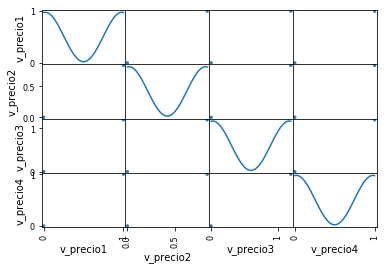

In [36]:
import matplotlib
from pandas.tools.plotting import scatter_matrix
scatter_matrix(un_producto[['v_precio1','v_precio2','v_precio3','v_precio4']] , diagonal="kde")

# Tenemos dos escenarios posibles principalmente:

## Múltiples gráficos en la misma ventana (figura):
 Si lo que quieres es usar subplots (distintos gráficos con su propio eje o no en una misma figura) 
 puedes usar matplotlib.pyplot.subplot o crear una instancia matplotlib.pyplot.figure previamente y 
 luego añadir subplots dinámicamente con el método matplotlib.pyplot.figure.add_subplot.
 La clave en ambos casos está en manejar los tres primeros parámetros, el primero indica el número de filas de la rejilla, 
 el segundo el número de columnas y el tercero el índice que ocupará el subplot en concreto que estamos agregando en esa 
 rejilla (este índice es base 1, es decir debe estar comprendido entre 1 y numero_filas x numero_columnas ambos incluidos).

## Múltiples gráficos pero en distintas ventanas (figuras):
 Si quieres que cada función o iteración del ciclo te muestre un gráfico en una ventana distinta entonces debes crear 
 una nueva figura cada vez.
 Vamos a ver mejor un ejemplo basado en tu código usando dos funciones, cada una de ellas va a graficar en su propia 
 ventana 4 subplots mediante llamadas iterativas, algo similar a tu código:

In [52]:
import random
import matplotlib.pyplot as plt



p = list(range(14))
q = [random.randint(0, 20) for _ in range(14)]


def filtro(p, q):
    q = [random.randint(0, 20) for _ in range(14)]
    return p, q


fig1 = plt.figure("Filtro")
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(1, 5):
    p, q = filtro(p, q)

    ax = fig1.add_subplot(2, 2, i)
    ax.plot(p,q,"g--")
    ax.set_xlabel("z")
    ax.set_ylabel("w")
    ax.set_title("cordenadas xy")
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    # Pintar los ejes pasando por (0,0)
    ax.axhline(0, color='black', linewidth=0.5)



def npotencia(array, exp):
    return [n ** exp for n in array]


# Creamos otra figura, se mostrar
fig2 = plt.figure("n ** i")
fig2.subplots_adjust(hspace=0.5, wspace=0.5)

x = list(range(1, 10))
for i in range(2, 6):
    y = npotencia(x, i)
    ax = fig2.add_subplot(2, 2, i-1)
    ax.plot(x, y, "r-.")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("n ** {}".format(i))
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.axhline(0, color='black', linewidth=0.5)

plt.show()


In [ ]:
fig2 = plt.figure("n ** i")
fig2.subplots_adjust(hspace=0.5, wspace=0.5)

x = list(range(1, 10))
for i in range(2, 6):
    y = npotencia(x, i)
    ax = fig2.add_subplot(2, 2, i-1)
    ax.plot(x, y, "r-.")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("n ** {}".format(i))
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.axhline(0, color='black', linewidth=0.5)

plt.show()

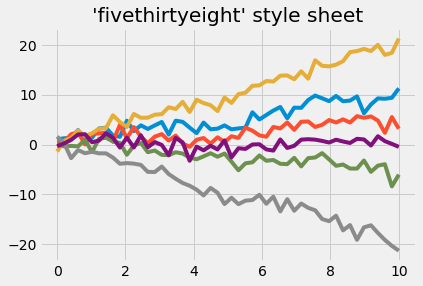

In [55]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

In [56]:
np.sin(x) + x + np.random.randn(50)

array([ 0.27851468,  0.33663933,  0.76882553, -1.06939557,  0.08777732,
        1.43373718,  2.14372137,  1.50446627,  3.67765336,  3.09843869,
        1.89410608,  2.7987092 ,  3.99184233,  1.64264768,  2.69767474,
        4.74814347,  2.11389555,  2.18089832,  3.90885879,  4.86635295,
        1.39600747,  3.50847915,  3.66355661,  4.55114571,  4.58163701,
        4.380026  ,  4.18933037,  6.01950933,  4.90124713,  6.77326894,
        7.38435503,  5.66841628,  6.67826261,  7.04527291,  8.45328576,
        8.64619395,  6.30771138,  7.3020914 ,  9.16436754,  7.52578194,
       10.24240201, 10.3118014 ,  8.52028148, 10.78567598,  8.47289268,
        9.81626561, 11.82203287,  7.92060034,  8.06143933,  9.81665549])

In [ ]:
pd.pivot_table(df,index=["Name"])

In [187]:
asd = resultado_prom_precio.transpose()
asd.reset_index(inplace=True)

In [4]:
ipath = ('ASD.xlsx')
asd = pd.read_excel(ipath)

In [5]:
columnas = asd.columns[1:]

In [6]:
columnas

Index(['BLAZER', 'BLUSA', 'BUZO', 'CALZA', 'CAMISETAS S/MANGA', 'CARDIGAN',
       'CHAQUETA', 'CHAQUETA DE JEAN', 'ENTERITO', 'FALDA', 'JEAN', 'LENCERIA',
       'PANTALON', 'PIJAMA', 'REMERA', 'ROPA DE PLAYA', 'SHORT',
       'SHORT DE JEAN', 'SWEATER', 'TOP', 'TOP DEPORTIVO', 'VESTIDO'],
      dtype='object')

In [7]:
for index,row in asd.iterrows():
    first_row= row.values
    break

In [193]:
[asd.rename(columns={ix:name},inplace=True) for ix ,name in enumerate(first_row)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [194]:
asd = asd.iloc[1:]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x = np.linspace(0,len(asd.index))

# Fixing random state for reproducibility


fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()


In [411]:
np.arange(0,asd['tipo'].count())


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [13]:
ORIGINAL = asd[asd['tipo'].str.find('original') != -1]
ORIGINAL.reset_index(drop=True,inplace=True)
PRECIO = asd[asd['tipo'].str.find('original') == -1]
PRECIO.reset_index(drop=True,inplace=True)

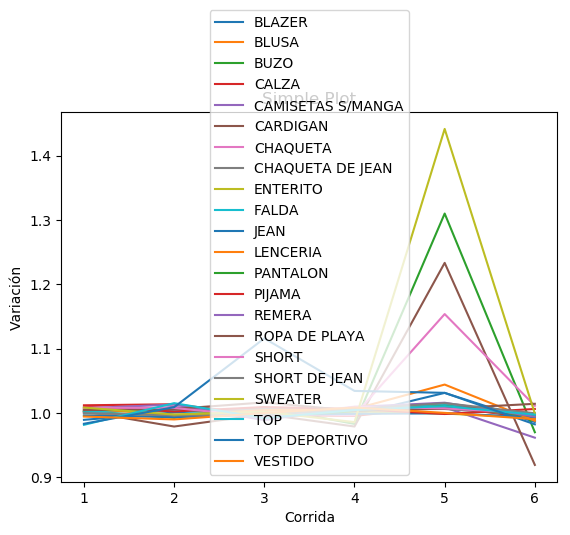

In [459]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('default')

x = np.arange(1,PRECIO['tipo'].count()+1)

fig, ax = plt.subplots()

for name in PRECIO.columns[1:]:
    ax.plot(x , PRECIO[name],label = name)
    
plt.xlabel('Corrida')
plt.ylabel('Variación')

plt.title("Simple Plot")

plt.legend()

plt.show()

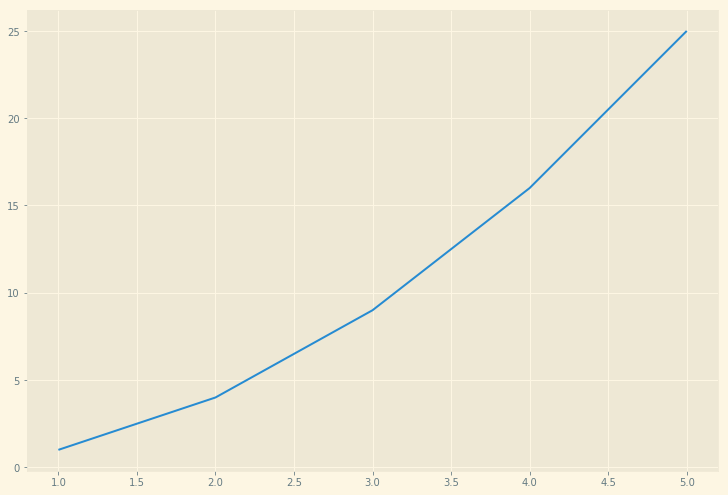

In [29]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(12,8))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

x= [1,2,3,4,5]

y=[x**2 for x in x]

axes.plot(x,y)

plt.show()

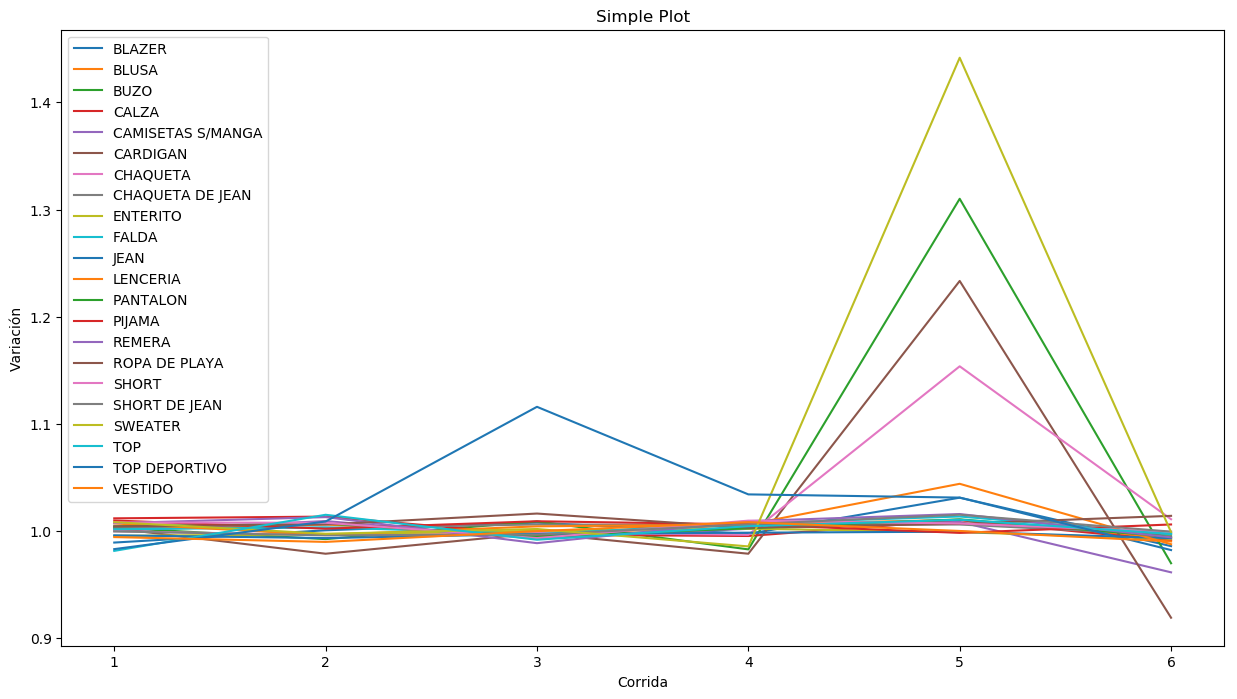

In [34]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('default')

x = np.arange(1,PRECIO['tipo'].count()+1)

fig, ax = plt.subplots(figsize=(15,8))

for name in PRECIO.columns[1:]:
    ax.plot(x , PRECIO[name],label = name)
    

plt.xlabel('Corrida')
plt.ylabel('Variación')

plt.title("Simple Plot")

plt.legend()

plt.show()


In [402]:
style_list = ['default', 'classic'] + sorted(style for style in plt.style.available if style != 'classic')

In [403]:
style_list

['default',
 'classic',
 'Solarize_Light2',
 '_classic_test',
 'bmh',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [17]:
PRECIO.head(3)

,tipo,BLAZER,BLUSA,BUZO,CALZA,CAMISETAS S/MANGA,CARDIGAN,CHAQUETA,CHAQUETA DE JEAN,ENTERITO,...,PANTALON,PIJAMA,REMERA,ROPA DE PLAYA,SHORT,SHORT DE JEAN,SWEATER,TOP,TOP DEPORTIVO,VESTIDO
0,prom_precio1,0.989374,1.001117,1.003147,1.011976,1.000217,1.002685,0.999955,1.003261,0.995610,...,1.004560,1.009963,1.007431,1.004501,1.008122,0.999752,1.008425,0.981603,0.983254,0.994472
1,prom_precio2,1.000806,1.006215,0.992582,1.013588,1.009422,0.978959,0.996412,1.003037,0.997183,...,1.007118,1.002321,1.013107,1.006207,1.007837,0.996116,0.997574,1.015289,1.009030,0.989986
2,prom_precio3,1.008016,0.995962,1.009088,0.996650,0.992981,0.998060,0.998858,1.006239,1.000270,...,0.994837,1.009249,0.988803,1.016435,0.993542,0.996776,1.002031,0.992031,1.116006,1.000030


In [22]:
df = pd.DataFrame({'ESTACION':['Verano','Otoño','Invierno','Primavera'],
              'CAMPERA':[0.589,0.855,1.333,0.64],
              'BUZO':[0.5,0.75,1.22,0.55],
              'REMERA':[1.37,0.855,0.343,0.64],
              'BLUSA':[0.714,0.855,1.02,0.64],
             })

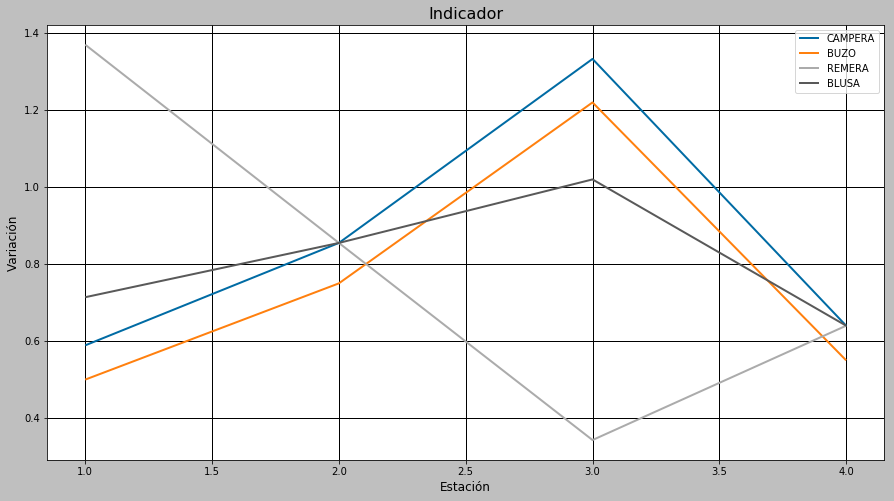

In [33]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('tableau-colorblind10')

x = np.arange(1,df['ESTACION'].count()+1)

fig, ax = plt.subplots(figsize=(15,8))

for name in df.columns[1:]:
    ax.plot(x , df[name],label = name)
    
plt.xlabel('Estación')
plt.ylabel('Variación')

plt.title("Indicador")

plt.legend()

plt.show()

In [38]:
PRECIO.columns

Index(['tipo', 'BLAZER', 'BLUSA', 'BUZO', 'CALZA', 'CAMISETAS S/MANGA',
       'CARDIGAN', 'CHAQUETA', 'CHAQUETA DE JEAN', 'ENTERITO', 'FALDA', 'JEAN',
       'LENCERIA', 'PANTALON', 'PIJAMA', 'REMERA', 'ROPA DE PLAYA', 'SHORT',
       'SHORT DE JEAN', 'SWEATER', 'TOP', 'TOP DEPORTIVO', 'VESTIDO'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaff355f98>,
      dtype=object)

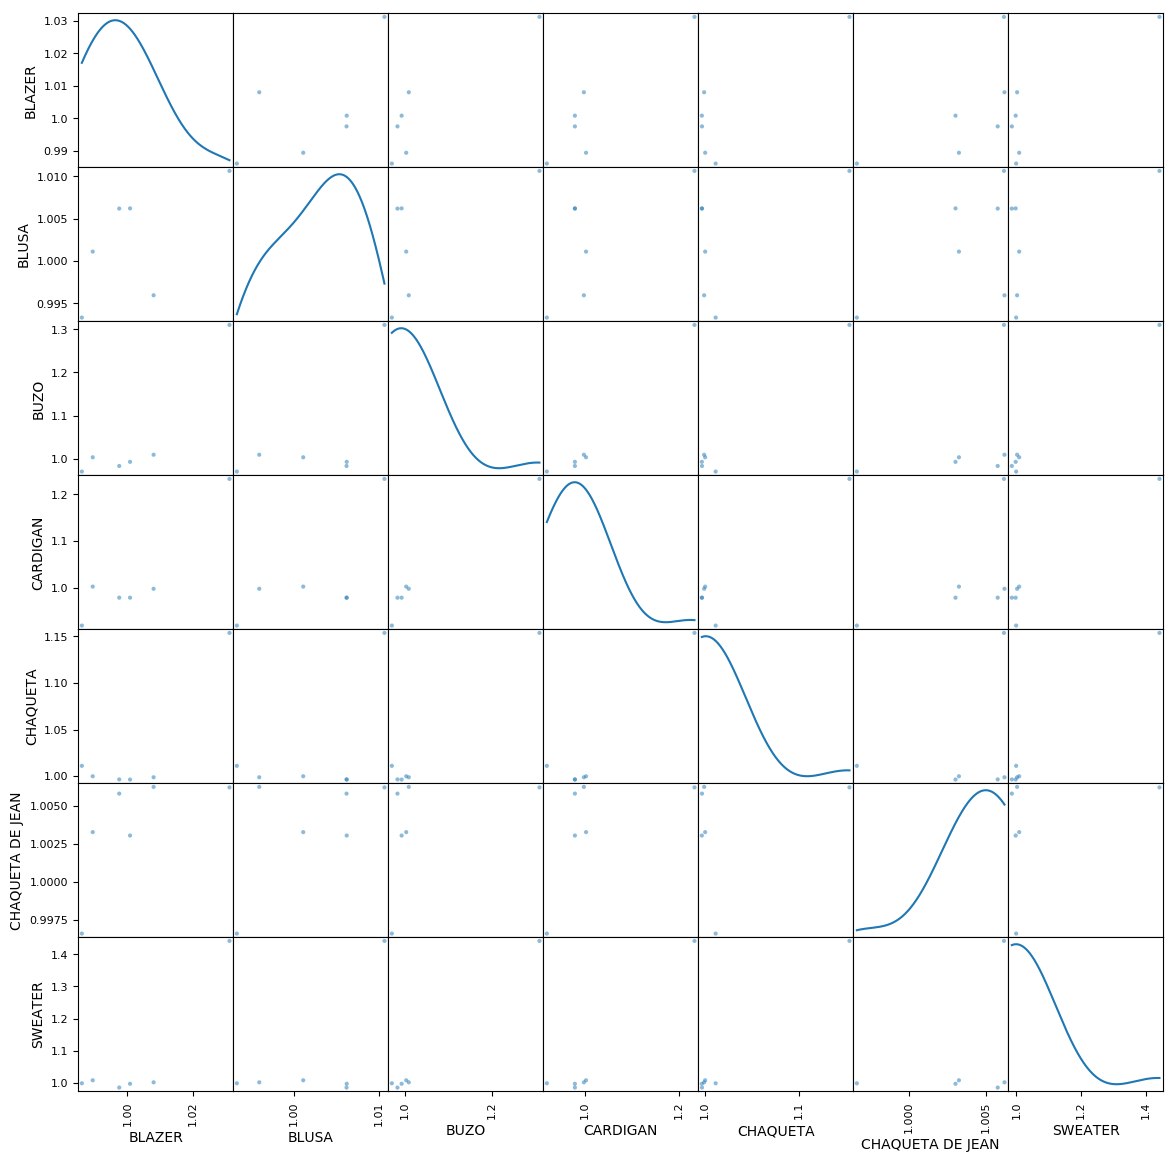

In [43]:
import matplotlib
from pandas.plotting import scatter_matrix
scatter_matrix(PRECIO[['BLAZER', 'BLUSA', 'BUZO',
       'CARDIGAN', 'CHAQUETA', 'CHAQUETA DE JEAN','SWEATER']] , diagonal="kde",figsize=(14,14))

In [ ]:
import matplotlib
from pandas.tools.plotting import scatter_matrix
scatter_matrix(PRECIO[['BLAZER', 'BLUSA', 'BUZO', 'CALZA', 'CAMISETAS S/MANGA',
       'CARDIGAN', 'CHAQUETA', 'CHAQUETA DE JEAN', 'ENTERITO', 'FALDA', 'JEAN',
       'LENCERIA', 'PANTALON', 'PIJAMA', 'REMERA', 'ROPA DE PLAYA', 'SHORT',
       'SHORT DE JEAN', 'SWEATER', 'TOP', 'TOP DEPORTIVO', 'VESTIDO']] , diagonal="kde")

In [6]:
ipath='/home/aa/cloudJ/JB/PRD/scrapper/Salida/dfSheinFULL2019-08-26.xlsx'

asd= pd.read_excel(ipath)

In [8]:
asd['Color'].unique()

array(['Black', 'White', 'Pink', 'Blue', 'Grey', 'Red', 'Green', 'Yellow',
       'Orange', 'Burgundy', 'Navy', 'Black and White', 'Army Green',
       'Multicolor', 'Camel', 'Beige', 'Brown', 'Bright', 'Purple',
       'Khaki', 'Pastel', 'Nude', 'Gold', 'Ombre', 'Animal', 'Plain',
       'Plants', 'Floral', 'Figure', 'Camouflage', 'Patchwork', 'Letter',
       'Leopard', 'Plaid', 'Striped', 'Único', 'Bralettes', 'Wireless',
       'Underwire', 'Strapless', 'Long Sets', 'Short Sets', 'Pajama Sets',
       'Robe Sets', 'Night Dresses', 'Pajama Bottoms', 'Apricot',
       'Champagne', 'Silver', 'ÚNICO'], dtype=object)

In [ ]:
PIJAMA,LENCERIA,CAMPERA BOMBER


In [29]:
asd[asd['Color']=='Strapless']

,id Producto,Talle,Marca,Tipo,Color,Sexo,Descripcion aux,Descripcion,Stock,Moneda,Precio,Precio Original,Precio Total,Fecha,Url Imagen,Url Producto
153244,swsexy03190520451,S,SHEIN,LENCERIA,Strapless,Mujer,0,Heart Print Sheer Bandeau With Shorts & Thong,999,DOLAR US$,6.0,6.0,5994.0,2019/08/22,https://img.ltwebstatic.com/images2_pi/2019/06...,https://www.shein.com/Heart-Print-Sheer-Bandea...
153245,swsexy03190520451,M,SHEIN,LENCERIA,Strapless,Mujer,0,Heart Print Sheer Bandeau With Shorts & Thong,999,DOLAR US$,6.0,6.0,5994.0,2019/08/22,https://img.ltwebstatic.com/images2_pi/2019/06...,https://www.shein.com/Heart-Print-Sheer-Bandea...
153246,swsexy03190520451,L,SHEIN,LENCERIA,Strapless,Mujer,0,Heart Print Sheer Bandeau With Shorts & Thong,999,DOLAR US$,6.0,6.0,5994.0,2019/08/22,https://img.ltwebstatic.com/images2_pi/2019/06...,https://www.shein.com/Heart-Print-Sheer-Bandea...
153247,swsexy03190520451,XL,SHEIN,LENCERIA,Strapless,Mujer,0,Heart Print Sheer Bandeau With Shorts & Thong,999,DOLAR US$,6.0,6.0,5994.0,2019/08/22,https://img.ltwebstatic.com/images2_pi/2019/06...,https://www.shein.com/Heart-Print-Sheer-Bandea...
153248,swsexy03190312348,S,SHEIN,LENCERIA,Strapless,Mujer,0,Heart Pattern Frill Trim Sheer Lingerie Set,253,DOLAR US$,6.0,6.0,1518.0,2019/08/22,https://img.ltwebstatic.com/images2_pi/2019/03...,https://www.shein.com/Heart-Pattern-Frill-Trim...
153249,swsexy03190312348,M,SHEIN,LENCERIA,Strapless,Mujer,0,Heart Pattern Frill Trim Sheer Lingerie Set,169,DOLAR US$,6.0,6.0,1014.0,2019/08/22,https://img.ltwebstatic.com/images2_pi/2019/03...,https://www.shein.com/Heart-Pattern-Frill-Trim...
153250,swsexy03190312348,L,SHEIN,LENCERIA,Strapless,Mujer,0,Heart Pattern Frill Trim Sheer Lingerie Set,144,DOLAR US$,6.0,6.0,864.0,2019/08/22,https://img.ltwebstatic.com/images2_pi/2019/03...,https://www.shein.com/Heart-Pattern-Frill-Trim...
153251,swsexy03190312348,XL,SHEIN,LENCERIA,Strapless,Mujer,0,Heart Pattern Frill Trim Sheer Lingerie Set,138,DOLAR US$,6.0,6.0,828.0,2019/08/22,https://img.ltwebstatic.com/images2_pi/2019/03...,https://www.shein.com/Heart-Pattern-Frill-Trim...


In [70]:
#***********

query = '''
select uc.*, c.tipo 
from (
select id_sc2_producto, talle, color , max(id_sc2_corrida) maxima_corrida  
from sc2_detalle 
group by id_sc2_producto, talle, color 
) uc 
inner join sc2_detalle c on c.id_sc2_producto = uc.id_sc2_producto and c.talle = uc.talle and c.color = uc.color  and c.id_sc2_corrida = maxima_corrida and c.tipo_vigente is null
'''
query = pd.read_sql(query,cnxn)

In [52]:
len(query)

1699

In [46]:
for index,row in query.iterrows():
    print(row)
    break

id_sc2_producto    swskirt04190807248
talle                               M
color                            Pink
maxima_corrida                     16
tipo                            FALDA
Name: 0, dtype: object


In [178]:
cursor = cnxn.cursor()
for index,row in query.iterrows():                                                            
    cursor.execute("""UPDATE sc2_detalle set tipo_vigente = '%s' 
    where id_sc2_producto = '%s' and talle = '%s' and color = '%s' and id_sc2_corrida = 16
    """%(row['tipo'],row['id_sc2_producto'],row['talle'],row['color'])) 
    cnxn.commit()
cursor.close()
cnxn.close()

In [177]:
len(query)

1699

In [174]:
for index,row in query.iterrows():
    print("""UPDATE sc2_detalle set tipo_vigente = '%s' 
    where id_sc2_producto ='%s' and talle = '%s'and color = '%s'
    """%(row['tipo'],row['id_sc2_producto'],row['talle'],row['color'])) 
    if index == 3:break

UPDATE sc2_detalle set tipo_vigente = 'BLUSA' 
    where id_sc2_producto ='blouse190121402' and talle = '120'and color = 'Multicolor'
    
UPDATE sc2_detalle set tipo_vigente = 'CAMPERA' 
    where id_sc2_producto ='outer180920008' and talle = '10'and color = 'Pink'
    
UPDATE sc2_detalle set tipo_vigente = 'CAMPERA' 
    where id_sc2_producto ='outer180920008' and talle = '12'and color = 'Pink'
    
UPDATE sc2_detalle set tipo_vigente = 'CAMPERA' 
    where id_sc2_producto ='outer180828714' and talle = '120'and color = 'Pink'
    


In [71]:
all_data = query.copy()

In [72]:
all_data = all_data[['tipo','id_sc2_producto','talle','color']]
for r in all_data.columns.values:
    all_data[r] = all_data[r].map(str)
    all_data[r] = all_data[r].map(str.strip)   
tuples = [tuple(x) for x in all_data.values]

In [14]:
string_list = ['NaT', 'nan', 'NaN', 'None']

def remove_wrong_nulls(x):
    for r in range(len(x)):
        for i,e in enumerate(tuples):
            for j,k in enumerate(e):
                if k == x[r]:
                    temp=list(tuples[i])
                    temp[j]=None
                    tuples[i]=tuple(temp)

remove_wrong_nulls(string_list)

In [73]:
def chunks(l, n):
    n = max(1, n)
    return [l[i:i + n] for i in range(0, len(l), n)]

new_list = chunks(tuples, 200)

In [74]:
new_list[0]

[('BLUSA', 'blouse190121402', '120', 'Multicolor'),
 ('CAMPERA', 'outer180920008', '10', 'Pink'),
 ('CAMPERA', 'outer180920008', '12', 'Pink'),
 ('CAMPERA', 'outer180828714', '120', 'Pink'),
 ('CAMPERA', 'outer180828714', '130', 'Pink'),
 ('CAMPERA', 'outer180828714', '140', 'Pink'),
 ('CAMPERA', 'outer180828714', '150', 'Pink'),
 ('CAMPERA', 'outer180828714', '160', 'Pink'),
 ('CAMPERA', 'outer180914702', '120', 'Pink'),
 ('CAMPERA', 'outer180914702', '130', 'Pink'),
 ('CAMPERA', 'outer180914702', '140', 'Pink'),
 ('CAMPERA', 'outer180914702', '150', 'Pink'),
 ('CAMPERA', 'outer180914702', '160', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '120', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '130', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '140', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '150', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '160', 'Pink'),
 ('CAMPERA', 'jacket181015702', '120', 'Pink'),
 ('CAMPERA', 'jacket181015702', '130', 'Pink'),
 ('CAMPERA', 'jacket181015702', '14

In [116]:
type(new_list[0])

list

In [107]:
sql_update_query

"update sc2_detalle set tipo_vigente = '%s' where id_sc2_producto = '%s' and talle = '%s' and color = '%s' and id_sc2_corrida = 16"

In [173]:
cursor = cnxn.cursor()
for i in range(len(new_list)):
    try:
        cursor.executemany(sql_update_query%(new_list[i]))
        cnxn.commit()
    except:
        print(type(new_list[i]))
        print(type(sql_update_query))
        print(sql_update_query%(new_list[i][i]))
        break
#cnxn.close()

<class 'list'>
<class 'str'>
update sc2_detalle set tipo_vigente = 'BLUSA' where id_sc2_producto = 'blouse190121402' and talle = '120' and color = 'Multicolor' and id_sc2_corrida = 16


In [22]:
try:
    cursor = connection.cursor()
    sql_update_query= """update sc2_detalle set tipo_vigente = '%s' where id_sc2_producto = '%s' and talle = '%s' and color = '%s' and id_sc2_corrida = 16"""
    # multiple records to be updated in tuple format
    records_to_update = [(3000, 3), (2750, 4)]
    cursor.executemany(sql_update_query, records_to_update)
    connection.commit()

    print(cursor.rowcount, "Records of a laptop table updated successfully")

except mysql.connector.Error as error:
    print("Failed to update records to database: {}".format(error))

In [76]:
new_list[0]

[('BLUSA', 'blouse190121402', '120', 'Multicolor'),
 ('CAMPERA', 'outer180920008', '10', 'Pink'),
 ('CAMPERA', 'outer180920008', '12', 'Pink'),
 ('CAMPERA', 'outer180828714', '120', 'Pink'),
 ('CAMPERA', 'outer180828714', '130', 'Pink'),
 ('CAMPERA', 'outer180828714', '140', 'Pink'),
 ('CAMPERA', 'outer180828714', '150', 'Pink'),
 ('CAMPERA', 'outer180828714', '160', 'Pink'),
 ('CAMPERA', 'outer180914702', '120', 'Pink'),
 ('CAMPERA', 'outer180914702', '130', 'Pink'),
 ('CAMPERA', 'outer180914702', '140', 'Pink'),
 ('CAMPERA', 'outer180914702', '150', 'Pink'),
 ('CAMPERA', 'outer180914702', '160', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '120', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '130', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '140', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '150', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '160', 'Pink'),
 ('CAMPERA', 'jacket181015702', '120', 'Pink'),
 ('CAMPERA', 'jacket181015702', '130', 'Pink'),
 ('CAMPERA', 'jacket181015702', '14

In [87]:
sql_update_query= """update sc2_detalle set tipo_vigente = '%s' where id_sc2_producto = '%s' and talle = '%s' and color = '%s' and id_sc2_corrida = 16"""
sql_update_query

"update sc2_detalle set tipo_vigente = '%s' where id_sc2_producto = '%s' and talle = '%s' and color = '%s' and id_sc2_corrida = 16"

In [100]:
for i in range(len(new_list)):
    print(new_list[i])
    break

[('BLUSA', 'blouse190121402', '120', 'Multicolor'), ('CAMPERA', 'outer180920008', '10', 'Pink'), ('CAMPERA', 'outer180920008', '12', 'Pink'), ('CAMPERA', 'outer180828714', '120', 'Pink'), ('CAMPERA', 'outer180828714', '130', 'Pink'), ('CAMPERA', 'outer180828714', '140', 'Pink'), ('CAMPERA', 'outer180828714', '150', 'Pink'), ('CAMPERA', 'outer180828714', '160', 'Pink'), ('CAMPERA', 'outer180914702', '120', 'Pink'), ('CAMPERA', 'outer180914702', '130', 'Pink'), ('CAMPERA', 'outer180914702', '140', 'Pink'), ('CAMPERA', 'outer180914702', '150', 'Pink'), ('CAMPERA', 'outer180914702', '160', 'Pink'), ('CAMPERA', 'skouter07181226814', '120', 'Pink'), ('CAMPERA', 'skouter07181226814', '130', 'Pink'), ('CAMPERA', 'skouter07181226814', '140', 'Pink'), ('CAMPERA', 'skouter07181226814', '150', 'Pink'), ('CAMPERA', 'skouter07181226814', '160', 'Pink'), ('CAMPERA', 'jacket181015702', '120', 'Pink'), ('CAMPERA', 'jacket181015702', '130', 'Pink'), ('CAMPERA', 'jacket181015702', '140', 'Pink'), ('CAMPE

In [108]:
sql_update_query= """update sc2_detalle set tipo_vigente = '%s' where id_sc2_producto = '%s' and talle = '%s' and color = '%s' and id_sc2_corrida = 16"""
# multiple records to be updated in tuple format
records_to_update = [(3000, 3), (2750, 4)]


In [176]:
sql_update_query%(new_list[0])

TypeError: not enough arguments for format string

In [147]:
sql_update_query%'3'

TypeError: not enough arguments for format string

In [148]:
asd="""asdasd {0} """

In [154]:
asd.format({2})

'asdasd {2} '

In [163]:
instr = "'%s', '%s', '%d', '%s', '%s', '%s', '%s'" % (softname, procversion, int(percent), exe, description, company, procurl)

In [169]:
sql_update_query%(new_list[i][i])

"update sc2_detalle set tipo_vigente = 'BLUSA' where id_sc2_producto = 'blouse190121402' and talle = '120' and color = 'Multicolor' and id_sc2_corrida = 16"

In [157]:
new_list[i]

[('BLUSA', 'blouse190121402', '120', 'Multicolor'),
 ('CAMPERA', 'outer180920008', '10', 'Pink'),
 ('CAMPERA', 'outer180920008', '12', 'Pink'),
 ('CAMPERA', 'outer180828714', '120', 'Pink'),
 ('CAMPERA', 'outer180828714', '130', 'Pink'),
 ('CAMPERA', 'outer180828714', '140', 'Pink'),
 ('CAMPERA', 'outer180828714', '150', 'Pink'),
 ('CAMPERA', 'outer180828714', '160', 'Pink'),
 ('CAMPERA', 'outer180914702', '120', 'Pink'),
 ('CAMPERA', 'outer180914702', '130', 'Pink'),
 ('CAMPERA', 'outer180914702', '140', 'Pink'),
 ('CAMPERA', 'outer180914702', '150', 'Pink'),
 ('CAMPERA', 'outer180914702', '160', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '120', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '130', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '140', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '150', 'Pink'),
 ('CAMPERA', 'skouter07181226814', '160', 'Pink'),
 ('CAMPERA', 'jacket181015702', '120', 'Pink'),
 ('CAMPERA', 'jacket181015702', '130', 'Pink'),
 ('CAMPERA', 'jacket181015702', '14